**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#Gradient Descent with Simple Linear Regression
In this project, you will generate a Simple Linear Regression model using gradient descent to minimize the cost function of the sum of squared errors.  You will compare the coefficients computed directly for a provided model, then you will recalculate the coefficients using the gradient descent cost minimization technique.

Please reference the video lectures on Gradient Descent for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.


-  **Step 1**:  
Calculate the coefficients for a simple linear regression model using the following equations:  (NOTE, you may NOT use any machine learning library models for this step - you must calculate the parameters use the equations shown).  
Normalize the dataset using the min and max of each of the variables (min/max of the X's and min/max of the y's), then use the equation shown to normalize each of the values in the columns:
          X_normalized = (X - Xmin)/(Xmax - Xmin)
          y_normalized = (y - ymin)/(ymax - ymin)
 The equations used to calculate the gradient are the partial derivatives of the cost function with respect to b0 and b1.  

$$\hat y = b_0+b_1x_1$$  
$$b_1=\frac {\sum
(x_n-\bar x)(y_n-\bar y)} {\sum
(x_n-\bar x)^2} $$  
$$b_0=\bar y-b_1\bar x$$  

-  **Step 2**:  
Write a function that implements gradient descent from scratch (i.e. you may not call any library functions) to generate the linear regression equation coefficients by minimizing the cost function.
Here we use the Sum of Squared Errors (SSE) cost function where n is the number of samples in the dataset, y is the dependent variable in the dataset, $b_0$ is the y-intercept for the linear equation, $b_1$ is the slope of the linear equation, and $x_1$ is the independent variable. 

$$SSE = \frac{1}{n}\sum(y - \hat y)^2 = \frac{1}{n}\sum(y - (b_0+b_1x_1))^2$$  

           API:  def gradientDescent(coeffs, X, y, lr, iterations):
           Input: coefficients: array of coefficients (i.e. b0 and b1) initialized to random values
                  X: normalized training dataset independent vars (see hint below)
                  y: normalized training dataset dependent vars (see hint below)
                  lr:  learning rate  
                  iterations: number of iterations to run
           Output: Returns b0_arr, b1_arr, SSE_arr (in this order), where b0_arr, b1_arr, SSE_arr are numpy arrays 
                   of the b0, b1 coefficients and sum-of-squared error respectively for each of the iterations performed in your gradient descent loop.

$$\frac{\partial(SSE)}{\partial(b0)} = \frac{1}{n}\cdot 2(y-(b_0+b_1x_1))\cdot -1 = -\frac{2}{n}(y-\hat y) $$

 $$\frac{\partial(SSE)}{\partial(b1)} = \frac{1}{n}\cdot 2(y-(b_0+b_1x_1))\cdot -x_1 = -\frac{2}{n}(y-\hat y)x_1 $$
> Hint:  
 - The following calculations are done over each sample in the training set (i.e. use a for loop).
 - Calc the model equation:  yhat = b0 + b1x 
 - Calc the gradient of b0:  sum(-(y-yhat))   
 - Calc the gradient of b1:  sum(-(y-yhat)*X)
 - Update the coefficients:  new coef = old coef + (learning rate)(error)(input).  
    - Update b0 = b0 - (learning rate) * (gradient of b0)  
    - Append calculated b0 to b0 array
    - Update b1 = b1 - (learning rate) * (gradient of b1)
    - Append calculated b1 to b1 array


- **Step 3**:  
Plot the equation of your model from the manual (Step 1) model and gradient descent (Step 2) model on the same graph along with your dataset points.  
Your plot should look something like this for random initial values of b0 and b1 and 50 iterations (note, it may not look exactly as the plot shown as it will be dependent on the initial random values of the coefficients).  The blue line in the graph is the equation with directly computed coefficients (Step 1), while the red line represents the coefficients calculated by minimizine the cost function with Gradient Descent (Step 2).  Also note that the plotted dataset has been normalized.

![alt text](https://docs.google.com/uc?export=download&id=1F5mxjjzqnuNC9mZNsJwXcHVDcN6TXKgw)


- **Step 4**:  
Experiment with different numbers of iterations to see how your gradient descent model changes compared to that of manual model.   You should observe an improvement with increased number of iterations such the two techniques converge with higher numbers of iterations. (i.e. the lines should coincide). Print out the the minimum number of iterations, values of your coefficients, and SSE for the line that visually is closest to the direct coefficients method (you should be able to find a number of iterations that basically overlays the two prediction lines). Note that we want to find a minimum number of iterations that also provides a minimized cost. 


- **Step 5**:  
Plot on a 3D graph your coefficients (b0 and b1), on x and y axes respectively, and SSE (Sum of Square Errors) on the z-axis.  Your plot should should the SSE converging to a minimum as shown in the figure below.  Note your graph will not look exactly as the plot shown as it will be depending on the initial random values of the coefficients and the number of iterations.  

![alt text](https://docs.google.com/uc?export=download&id=1buL6OC40DMZJduCQIh66PDBOxYbRieN3)


- **Step 6**:  
Calculate the performance for both techniques (Step 2, Step 3) using the r-squared score metric.  
Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html  
Why does the R-square score for the direct calculated coefficients remain constant, and why is it relatively low?  
Why does the R-square score change from run to run for the gradient descent calculated coefficients?



0.17314816556029855      0.5725053622253762


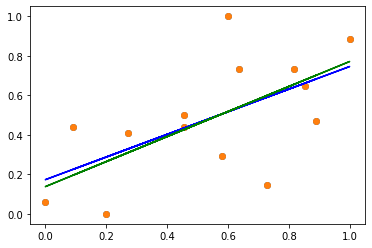

The R^2 score for the direct linear regression is 0.3573300148076216
The R^2 score for the gradient desecent is 0.353246377459992


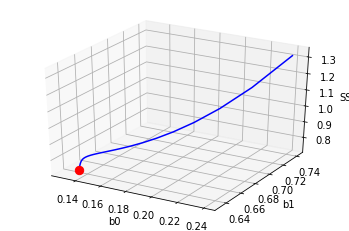

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from sklearn.metrics import r2_score

#Input Parameters
X = Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Y = Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])                   


#Step 1:  Create a function which MANALLY (using the equations) calculates the 
#         coefficients for a simple linear regression model, then plot the calculated 
#         regression line on top of the dataset.
#         Your function must input numpy arrays for the x and y variables and return b0 and b1.
#         Your function MUST use equations shown in the text cell above. 
#         Note - you may not use a machine learning library model for this step.
#         Note - you may (should) use the function you created in the Linear Prediction Project.
#         Note - normalize your data using the min/max method before calculating the coefficients.

#Normalize the data using the following min/max method:
#Normalized Sample = (Sample - Sample.min)/(Sample.max - Sample.min)
X_normalized = np.array([(Age - np.amin(Age))/(np.amax(Age) - np.amin(Age))])
Y_normalized = np.array([(Glucose - np.amin(Glucose))/(np.amax(Glucose) - np.amin(Glucose))])  


#Write a function to calculate the Linear Regression coefficients manually.
#Use the function in your previous project on simple linear regression.
def simpleLRcoeffsManual(X, Y):
  b1 = (np.sum((X - np.mean(X)) * (Y - np.mean(Y)))) / (np.sum((X - np.mean(X))**2))
  b0 = np.mean(Y) - (b1 * np.mean(X))
  
  return b0, b1

#Print out your coefficients, prediction (yhat or ypred), and the SSE
# print("""
#       𝑦̂(y hat) = {}
#       SSE = {}""".format(simpleLRcoeffsManual(X_normalized, Y_normalized), SSE))


#Plot the data and prediction line for the manual calculation
b0, b1 = simpleLRcoeffsManual(X_normalized, Y_normalized)
yDirect = b0 + (b1 * X_normalized[0])
plt.scatter(X_normalized, Y_normalized)
plt.plot(X_normalized[0], b0 + b1 * X_normalized[0], 'b')

print(b0, "    ", b1)

#Step 2:  Write a function that implements gradient descent to minimize the cost function.
#         where the cost function is sum-of-square error (SSE) = 1/n*sum(y - yhat)^2 = 1/n*sum(y-(b0+b1*X))^2
#         Inputs:  coeffs:  array of coefficients b0 and b1 initialized to random values 
#                  X:  dataset normalized independent variable values
#                  y:  dataset normalized dependent variable values
#                  lr: learning rate
#                  iterations:  number of iterations
#         Outputs: Returns b0_arr, b1_arr, SSE_arr (in this order)
#         def gradientDescent(coeffs, X, y, lr, iterations):
#
def gradientDescent(coeffs, X, y, lr, iterations):
  b0Array = []
  b1Array = []
  SSEArray = []

  b0 = coeffs[0]
  b1 = coeffs[1]
  n = len(X)

  for j in range(iterations):
    for i in range(len(X)):
      yHat = b0 + (b1 * X[i])
      gradientOfB0 = np.sum(-(y[i] - yHat))
      gradientOfB1 = np.sum(-(y[i] - yHat) * X[i])
      SSEArray.append(1/len(X) * np.sum((y - (b0 + b1*X)) ** 2))
      
      b0 = b0 - (lr * gradientOfB0)
      b0Array.append(b0)
      b1 = b1 - (lr * gradientOfB1)
      b1Array.append(b1)

  return b0Array, b1Array, SSEArray

# Step 3: Plot the equation of your model from the manual (Step 1) model and gradient descent (Step 2) model 
#         on the same graph along with your dataset points. 
#         Note, Use the normalized dataset. 
# YOUR CODE HERE...
bc0, bc1, sse = gradientDescent([.26743, .758453], X_normalized, Y_normalized, 0.01, 50)
yGradient = bc0[-1] + (bc1[-1] * X_normalized[0])

plt.plot(X_normalized[0], bc0[-1] + bc1[-1] * X_normalized[0], 'g')
plt.scatter(X_normalized, Y_normalized)
# plt.show()


# Step 4:  Experiment with different numbers of iterations to see how your gradient descent 
#          model changes compared to that of manual model.   You should observe an improvement 
#          with increased number of iterations such the two techniques converge with higher numbers 
#          of iterations. (i.e. the lines should coincide). Print out the the minimum number of 
#          iterations, values of your coefficients, and SSE for the line that visually is closest to the 
#          direct coefficients method.
# bc0, bc1, sse = gradientDescent([.26743, .758453], X_normalized, Y_normalized, 0.01, 500)
# plt.plot(X_normalized[0], bc0[-1] + bc1[-1] * X_normalized[0], 'r')

# bc0, bc1, sse = gradientDescent([.26743, .758453], X_normalized, Y_normalized, 0.05, 500)
# plt.plot(X_normalized[0], bc0[-1] + bc1[-1] * X_normalized[0], 'r')

# bc0, bc1, sse = gradientDescent([.26743, .758453], X_normalized, Y_normalized, 0.1, 50000)
# plt.plot(X_normalized[0], bc0[-1] + bc1[-1] * X_normalized[0], 'r')


plt.show()


# Step 5: Plot on a 3D graph your coefficients (b0 and b1), on x and y axes respectively, 
#         and SSE (Sum of Square Errors) on the z-axis.  Your plot should should the 
#         SSE converging to a minimum as shown in the figure below.  Note your graph will 
#         not look exactly as the plot shown as it will be depending on the initial 
#         random values of the coefficients and the number of iterations. 
#         Hint: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html 
# YOUR CODE HERE...
from mpl_toolkits import mplot3d
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('SSE')

xline = bc0
yline = bc1
zline = sse
ax.plot3D(xline, yline, zline, 'blue')
ax.scatter(bc0[-1], bc1[-1], sse[-1], color='r', s=70)

#Highlight the last coefficents (should be the ones with the minimized cost)


#Step 6:  Calculate the performance for both techniques (Step 2, Step 3) using the r-squared score metric.  
# YOUR CODE HERE...

print("The R^2 score for the direct linear regression is", r2_score(Y_normalized[0], yDirect))
print("The R^2 score for the gradient desecent is", r2_score(Y_normalized[0], yGradient))

